In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
print(sys.path)

['/media/jayanth/New Volume/time_series_modeling/ppg_dalia_heartrate_estimation/notebooks', '/home/jayanth/anaconda3/envs/tf2/lib/python38.zip', '/home/jayanth/anaconda3/envs/tf2/lib/python3.8', '/home/jayanth/anaconda3/envs/tf2/lib/python3.8/lib-dynload', '', '/home/jayanth/anaconda3/envs/tf2/lib/python3.8/site-packages', '/home/jayanth/anaconda3/envs/tf2/lib/python3.8/site-packages/IPython/extensions', '/home/jayanth/.ipython']


In [4]:
sys.path.append('/media/jayanth/New Volume/time_series_modeling/ppg_dalia_heartrate_estimation/')

In [5]:
from src.visualization import visualize

In [6]:
import os
print(os.getcwd())

/media/jayanth/New Volume/time_series_modeling/ppg_dalia_heartrate_estimation/notebooks


In [7]:
filepath = "../data/raw/"

In [8]:
dfs=[]
for i in range(1,16):
    dfs.append(visualize.create_dataframe(filepath,subject_name='S{}'.format(i)))

Generate subject-wise violinplots for heart rate distributions for different activities

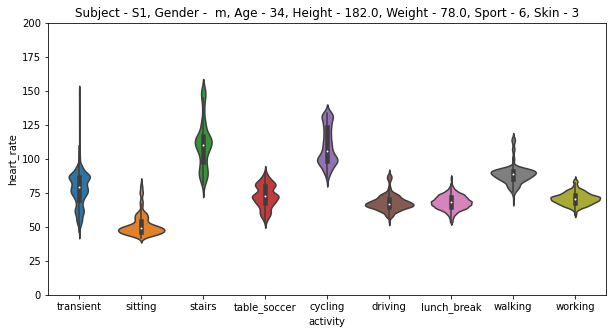

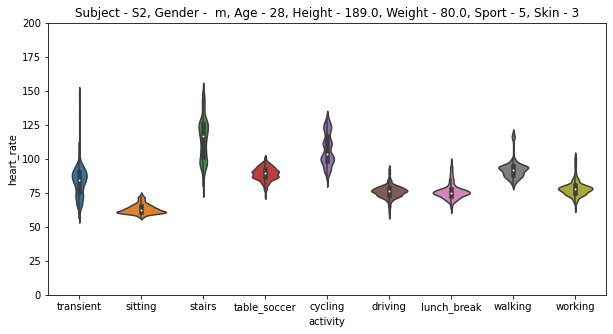

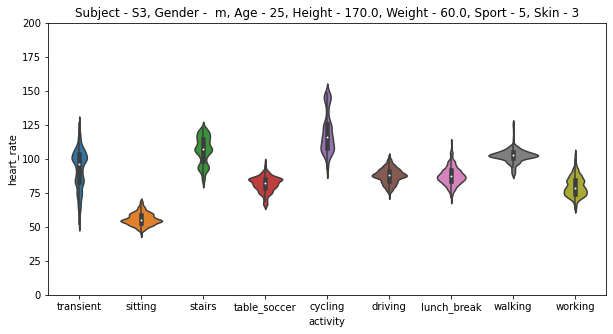

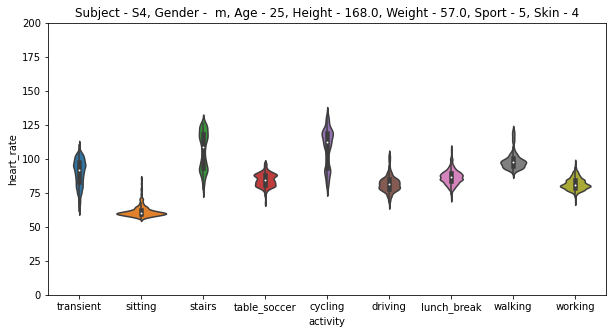

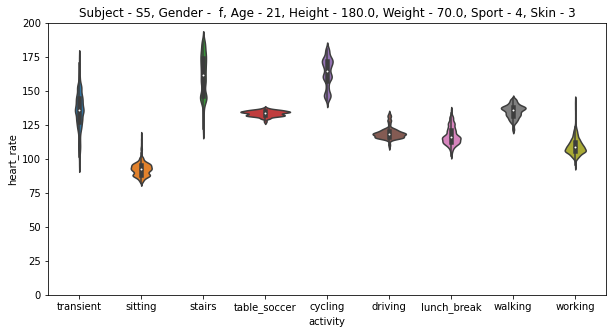

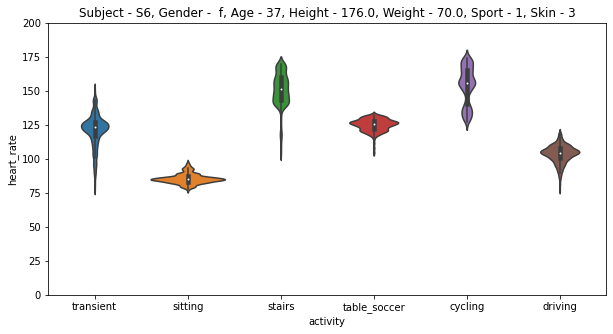

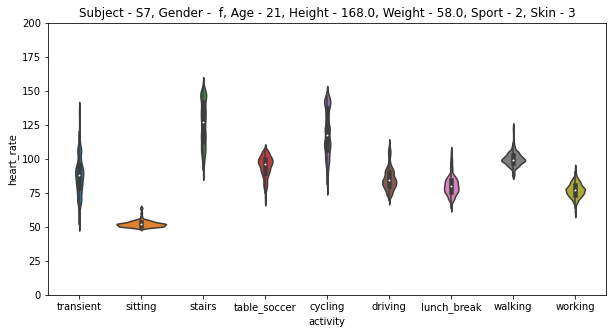

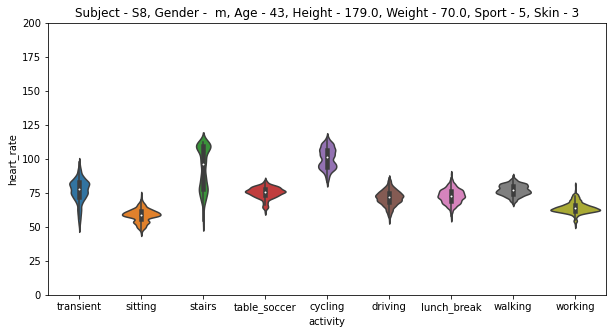

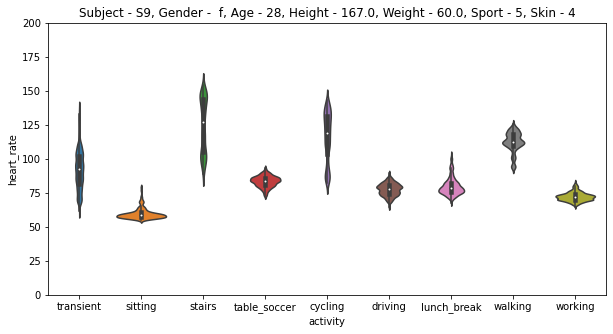

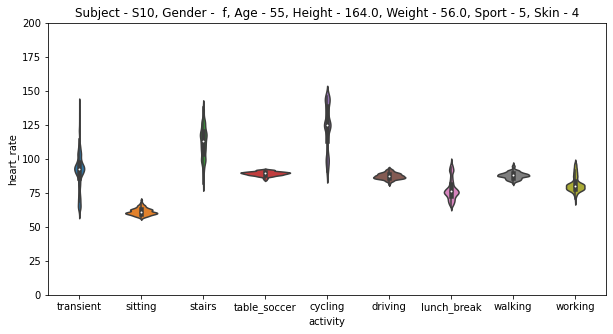

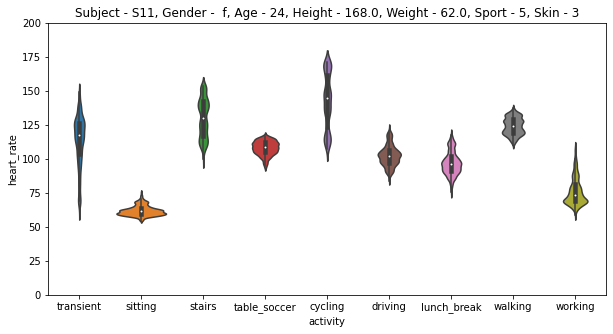

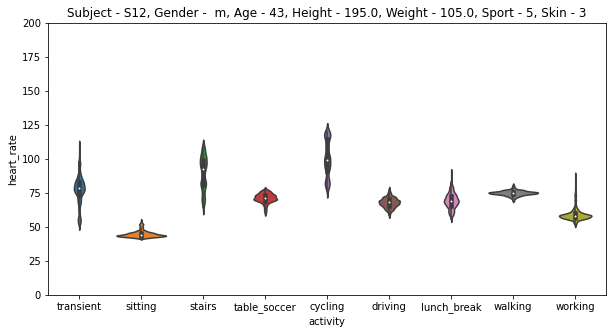

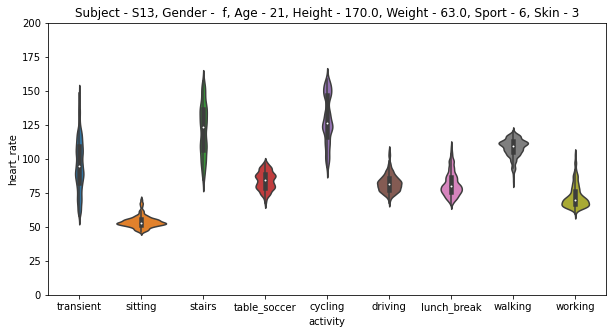

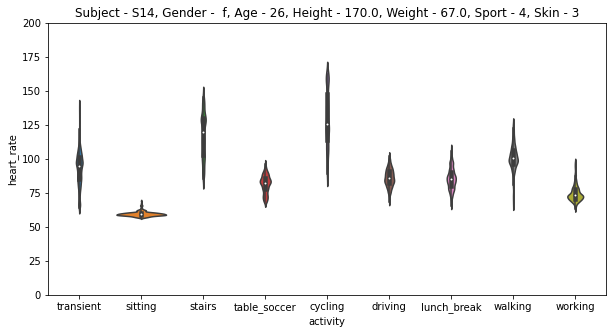

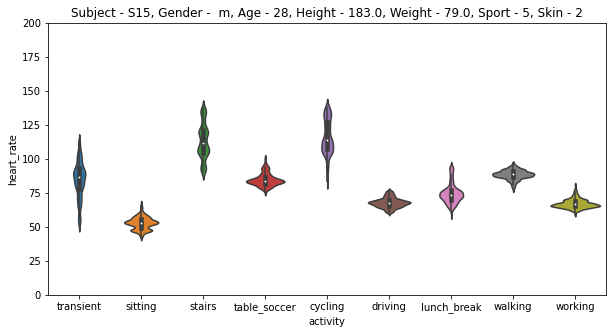

In [9]:
for df in dfs:
    fig = visualize.activityhr_violinplots(df)
    plt.show()

In [10]:
from collections import defaultdict

In [13]:
ACTIVITY_DICT = {
    0: "transient",
    1: "sitting",
    2: "stairs",
    3: "table_soccer",
    4: "cycling",
    5: "driving",
    6: "lunch_break",
    7: "walking",
    8: "working",
}

In [38]:
subject_dict = defaultdict(list)
for i in range(len(dfs)):
    subject_dict['subject'].append(i+1)
    subject_dict['gender'].append(dfs[i]["gender"][0])
    subject_dict["age"].append(dfs[i]["age"][0])
    subject_dict["height"].append(dfs[i]["height"][0])
    subject_dict["weight"].append(dfs[i]["weight"][0])
    subject_dict["sport"].append(dfs[i]["sport"][0])
    subject_dict["skin"].append(dfs[i]["skin"][0])
    
    for key,activity in ACTIVITY_DICT.items():
        filt = dfs[i]["activity"]==key
        df = dfs[i][filt]
        subject_dict["mean_hr_{}".format(activity)].append(np.mean(df['heart_rate']))
        subject_dict["max_hr_{}".format(activity)].append((df['heart_rate'].max()))       
        subject_dict["min_hr_{}".format(activity)].append((df['heart_rate'].min())) 

In [39]:
df=pd.DataFrame(subject_dict)

In [40]:
df.head()

,subject,gender,age,height,weight,sport,skin,mean_hr_transient,max_hr_transient,min_hr_transient,...,min_hr_driving,mean_hr_lunch_break,max_hr_lunch_break,min_hr_lunch_break,mean_hr_walking,max_hr_walking,min_hr_walking,mean_hr_working,max_hr_working,min_hr_working
0,1,m,34,182.0,78.0,6,3,78.280475,149.510157,45.993465,...,53.595072,68.238051,86.249273,53.325091,88.804146,116.195694,68.734765,71.043107,85.531517,58.968394
1,2,m,28,189.0,80.0,5,3,83.636839,149.248183,56.855197,...,58.045608,76.195397,98.345443,62.249513,92.497391,118.921372,80.602134,78.473804,102.641946,63.093752
2,3,m,25,170.0,60.0,5,3,92.835173,126.489860,52.211113,...,72.685429,87.639212,112.541349,69.536062,102.566680,126.431561,88.013626,80.013967,104.158482,63.252462
3,4,m,25,168.0,57.0,5,4,90.054343,110.228215,62.074324,...,65.713731,86.808878,108.219842,70.523081,98.959035,121.628383,88.833402,81.920250,97.825598,67.798821
4,5,f,21,180.0,70.0,4,3,135.636608,175.638049,94.940242,...,108.659911,117.124879,136.137079,102.514076,135.264873,144.563339,121.047589,109.664568,143.644877,94.617744


Checking effect of gender on heart rates

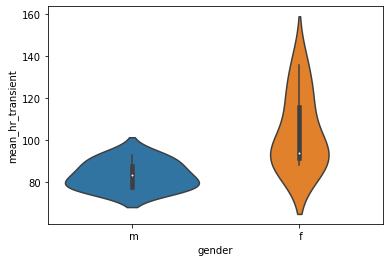

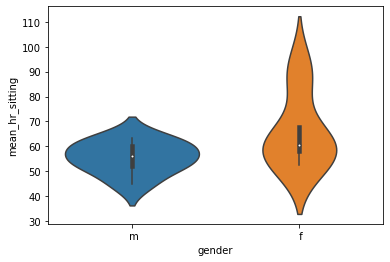

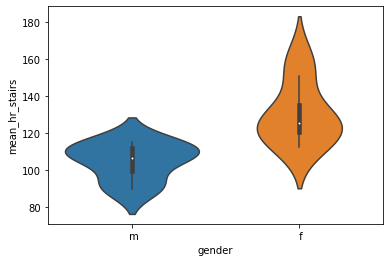

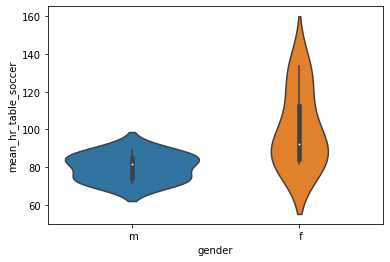

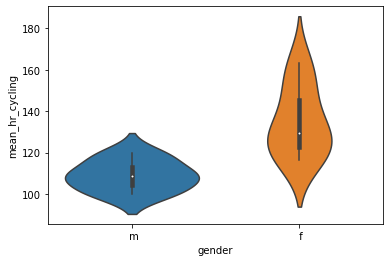

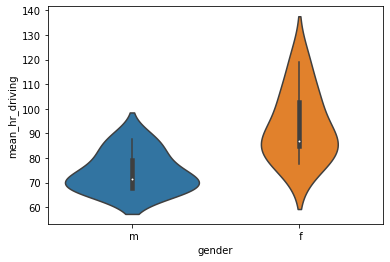

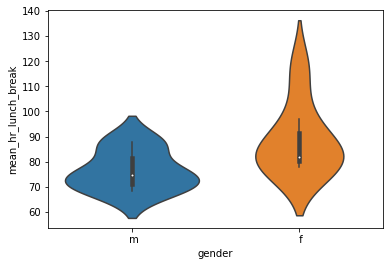

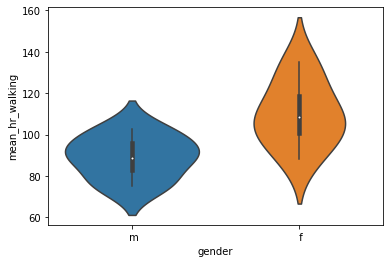

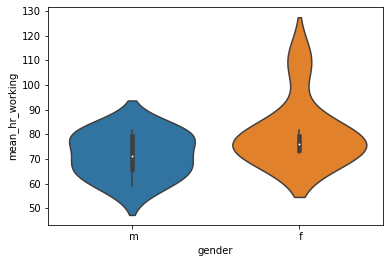

In [26]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="gender",y="mean_hr_{}".format(activity),data=df)
    plt.show()

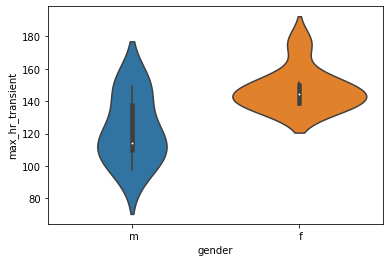

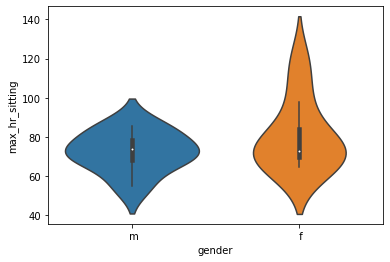

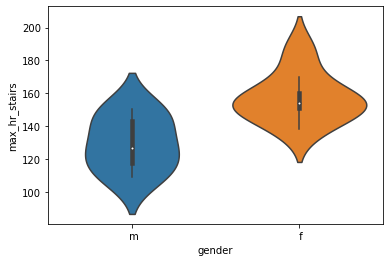

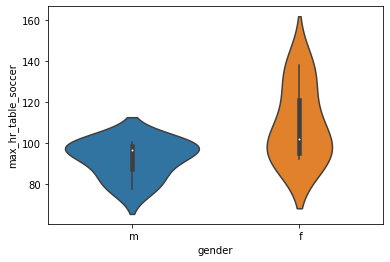

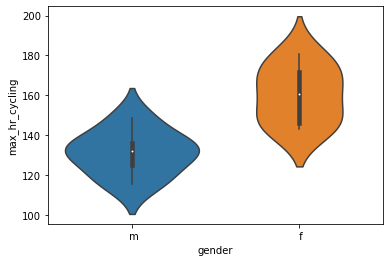

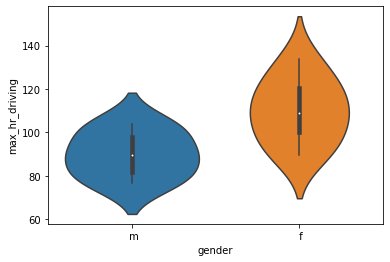

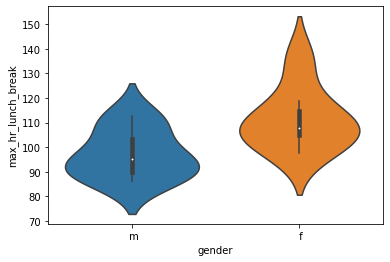

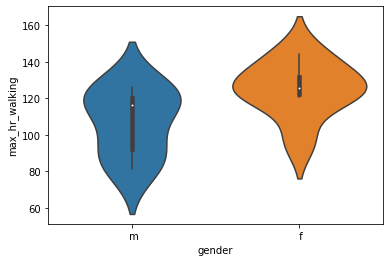

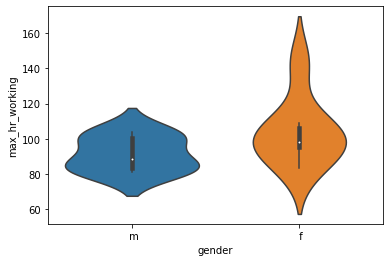

In [41]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="gender",y="max_hr_{}".format(activity),data=df)
    plt.show()

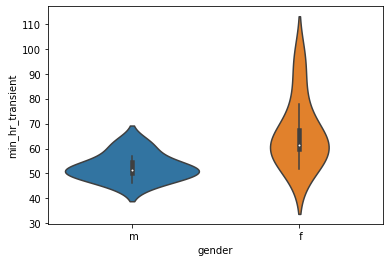

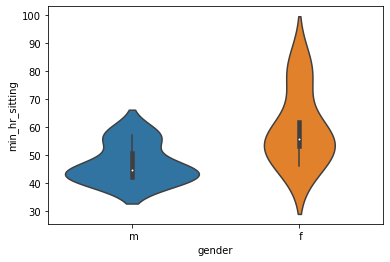

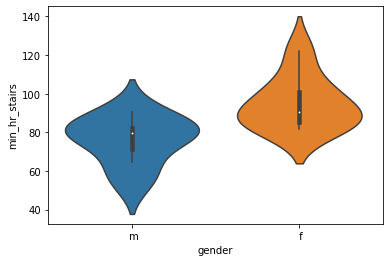

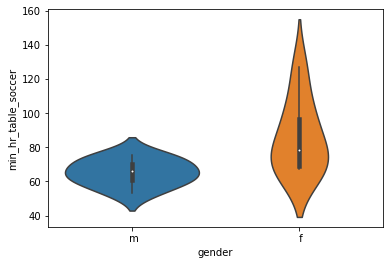

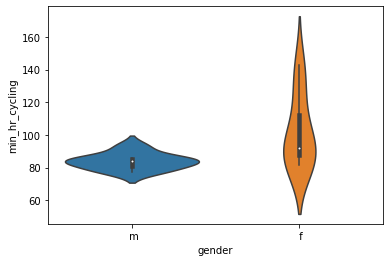

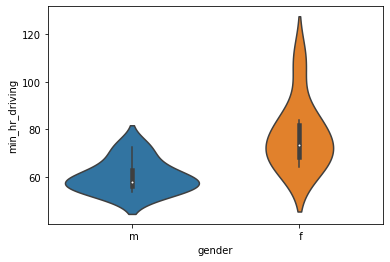

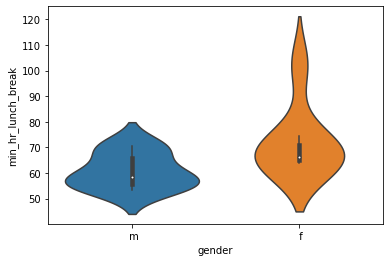

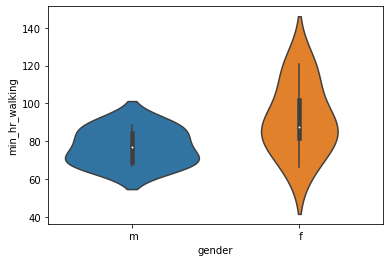

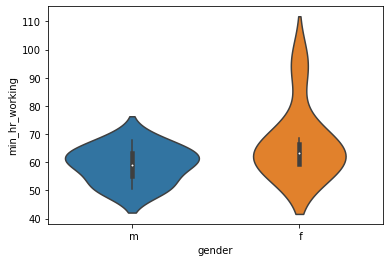

In [42]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="gender",y="min_hr_{}".format(activity),data=df)
    plt.show()

Checking effect on fitness on heart rates

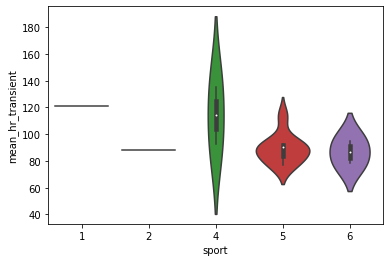

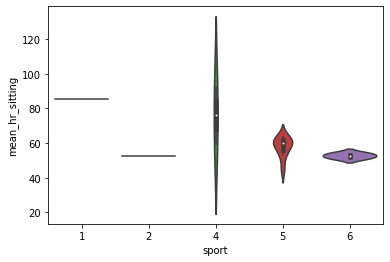

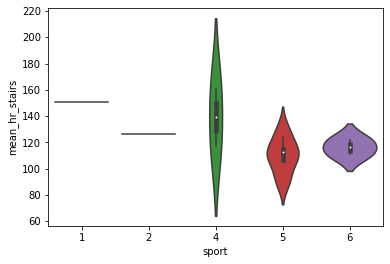

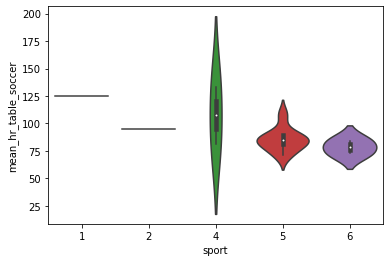

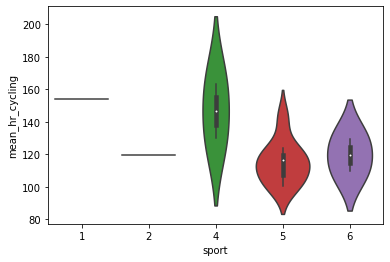

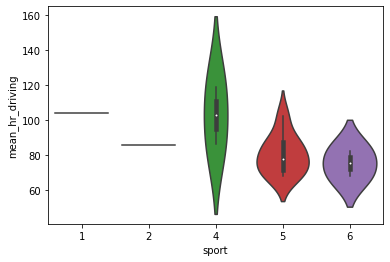

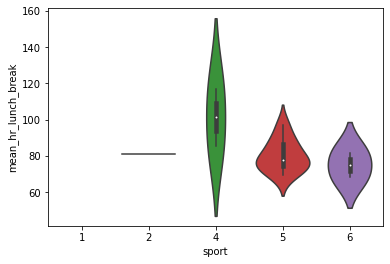

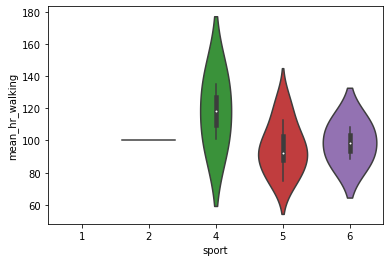

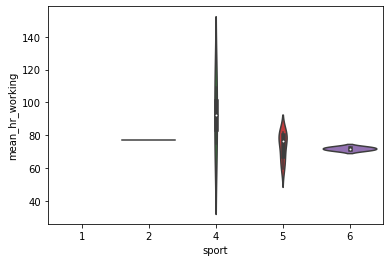

In [27]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="sport",y="mean_hr_{}".format(activity),data=df)
    plt.show()

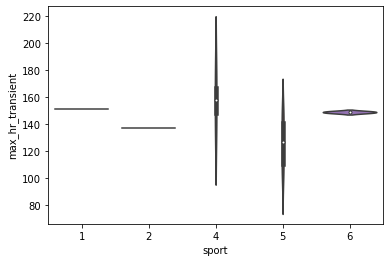

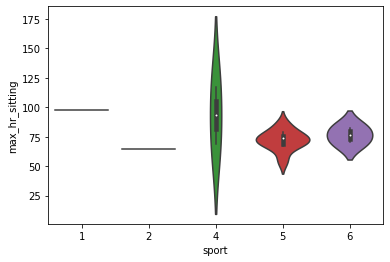

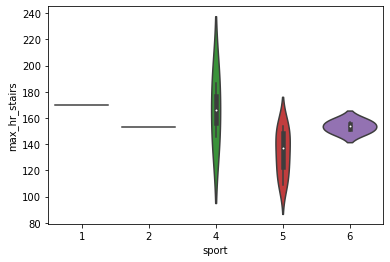

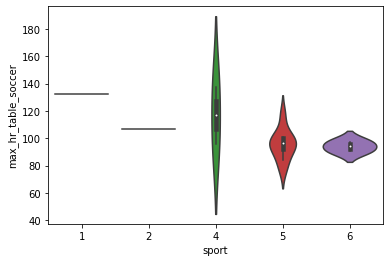

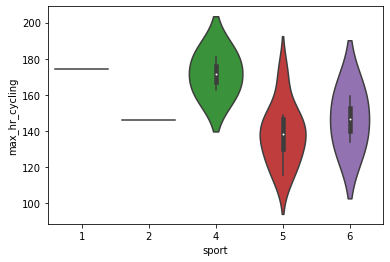

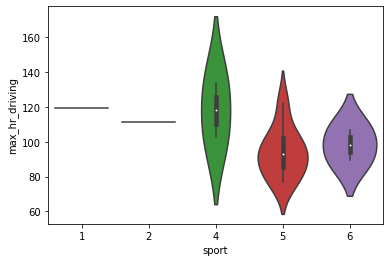

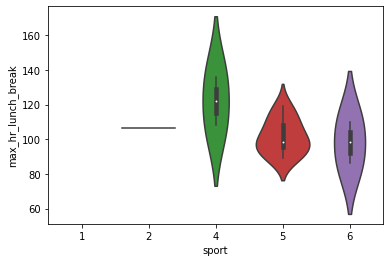

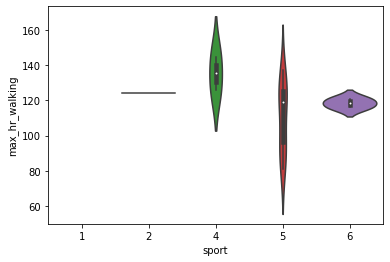

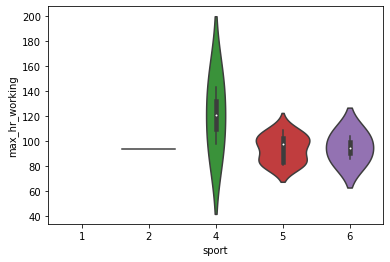

In [43]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="sport",y="max_hr_{}".format(activity),data=df)
    plt.show()

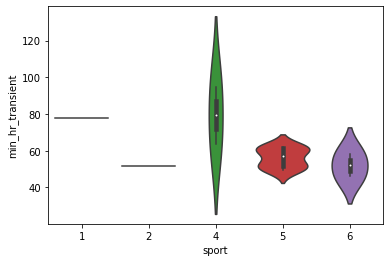

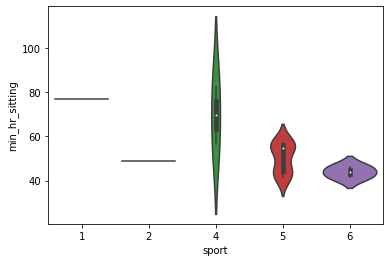

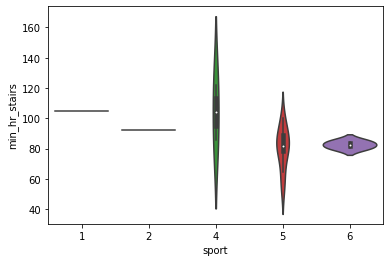

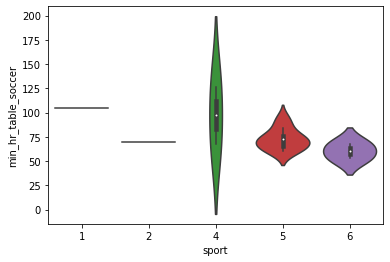

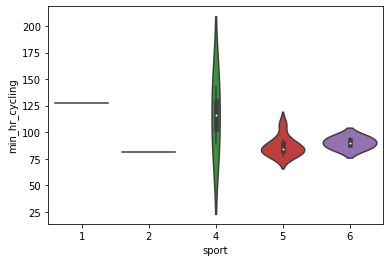

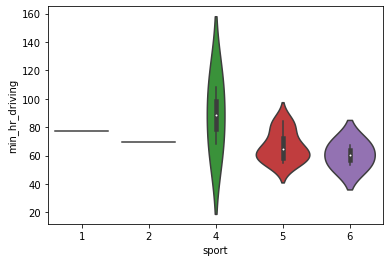

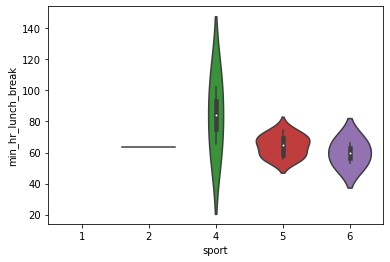

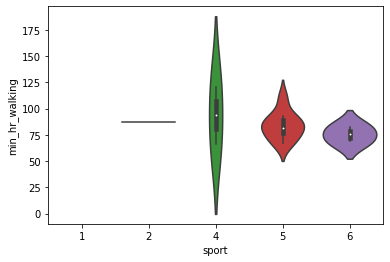

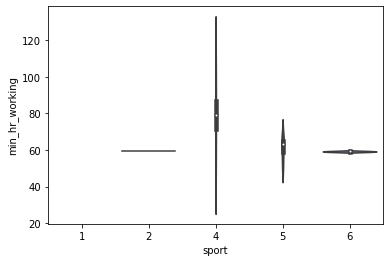

In [44]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="sport",y="min_hr_{}".format(activity),data=df)
    plt.show()

Checking effect on skin type on heart rates

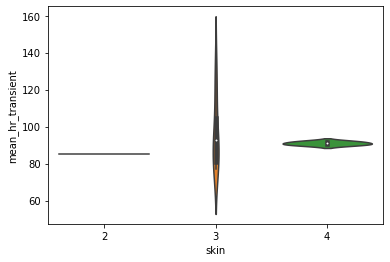

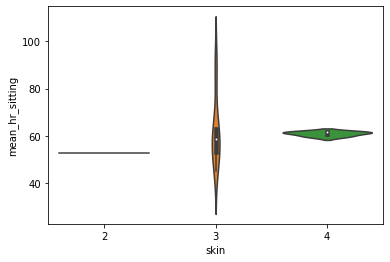

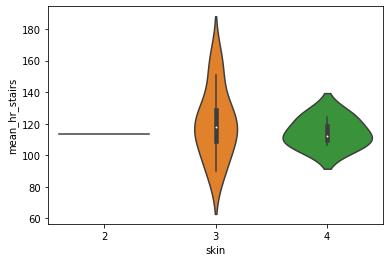

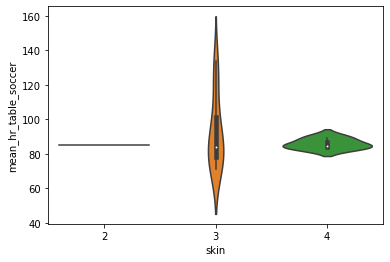

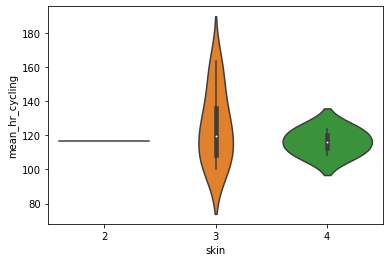

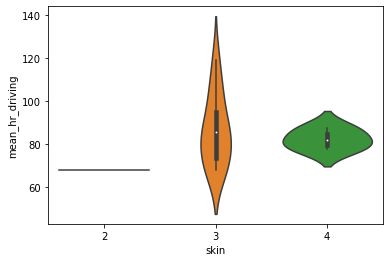

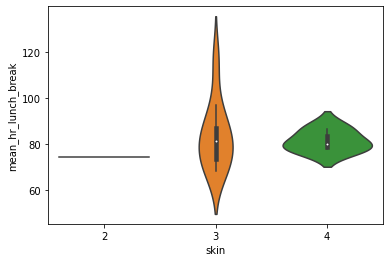

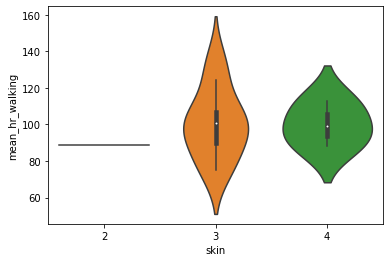

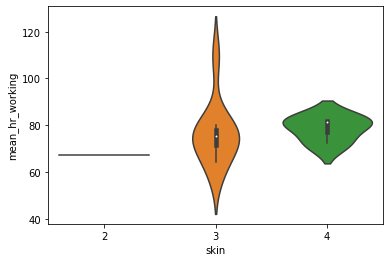

In [46]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="skin",y="mean_hr_{}".format(activity),data=df)
    plt.show()

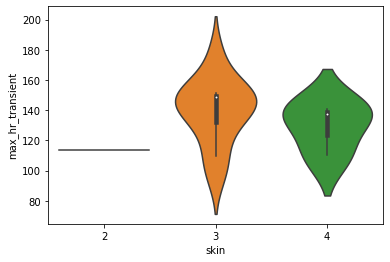

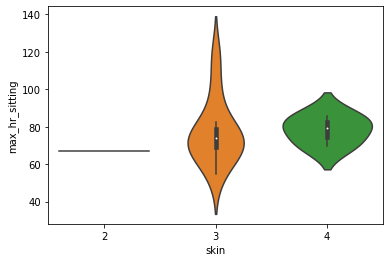

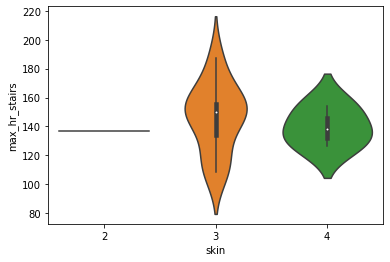

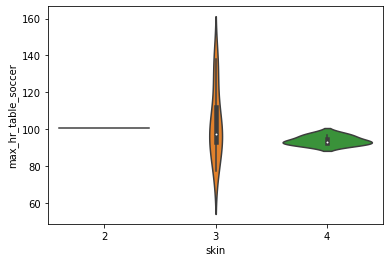

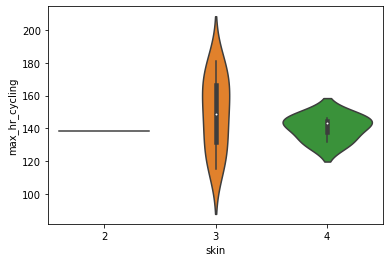

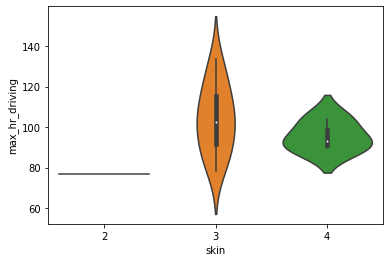

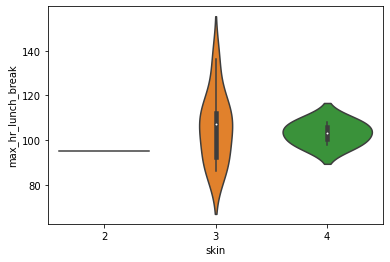

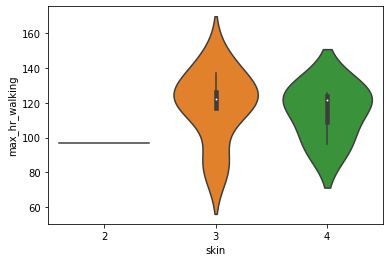

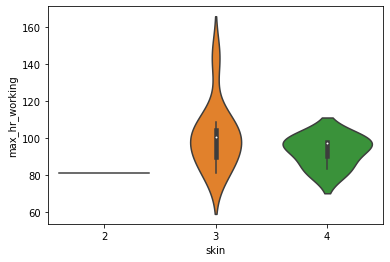

In [47]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="skin",y="max_hr_{}".format(activity),data=df)
    plt.show()

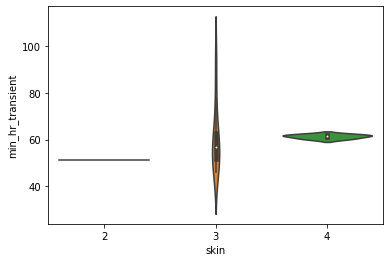

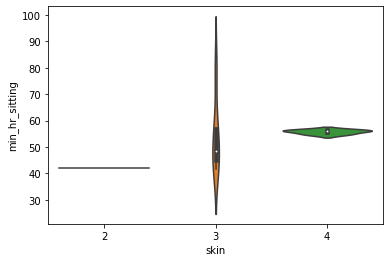

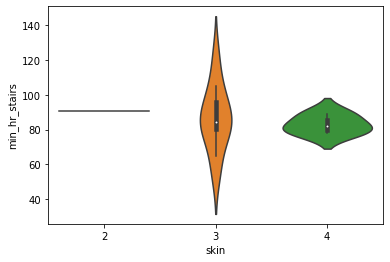

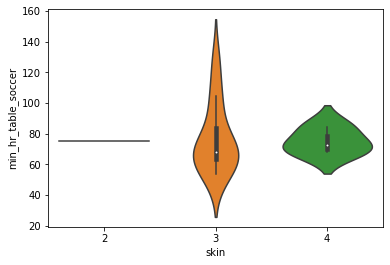

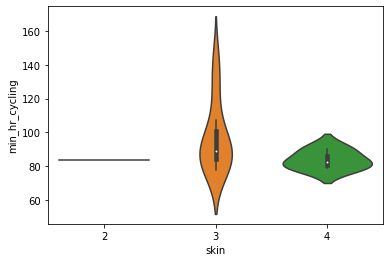

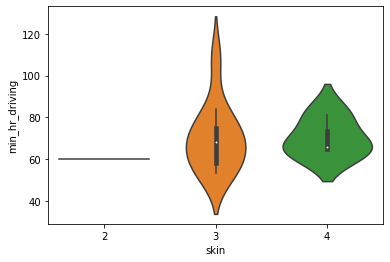

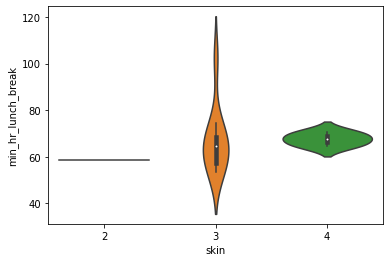

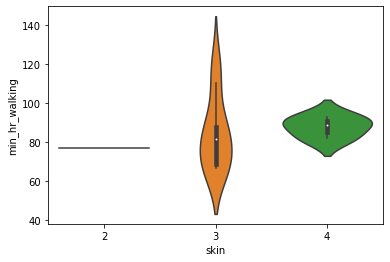

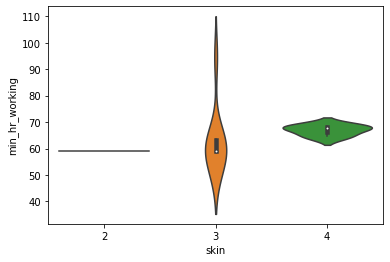

In [48]:
for _, activity in ACTIVITY_DICT.items():
    sns.violinplot(x="skin",y="min_hr_{}".format(activity),data=df)
    plt.show()

Checking effect of height,weight and age on heart rates

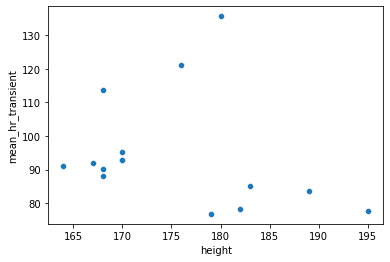

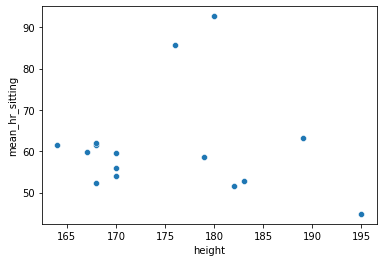

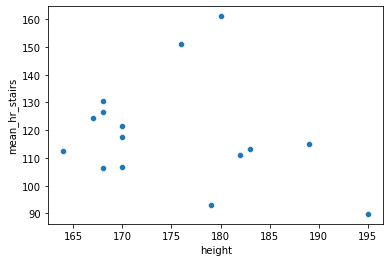

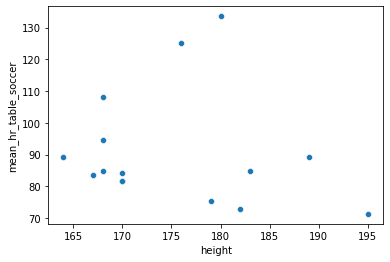

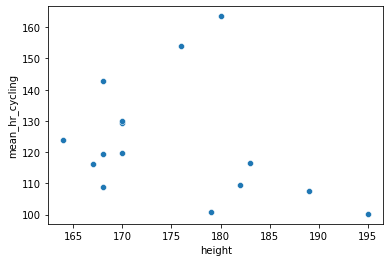

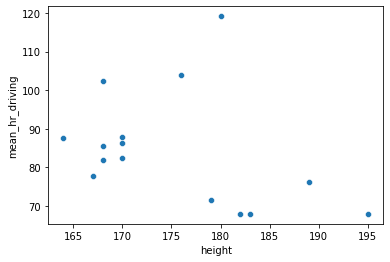

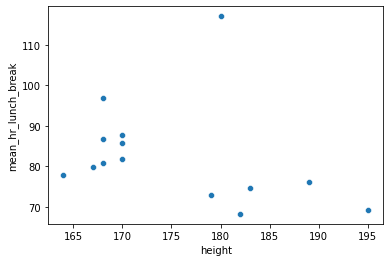

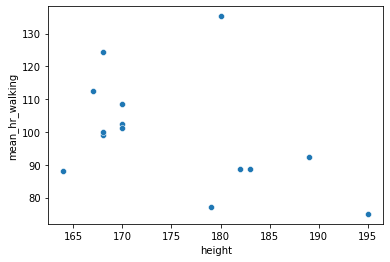

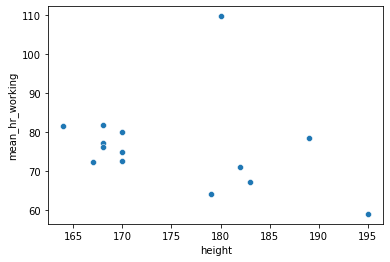

In [49]:
for _, activity in ACTIVITY_DICT.items():
    sns.scatterplot(x="height",y="mean_hr_{}".format(activity),data=df)
    plt.show()

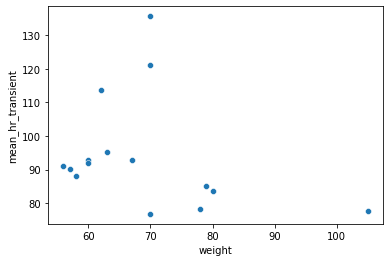

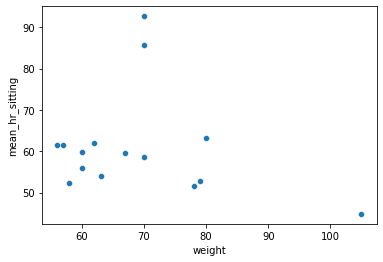

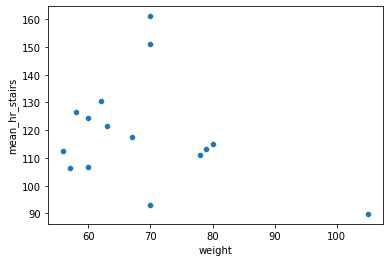

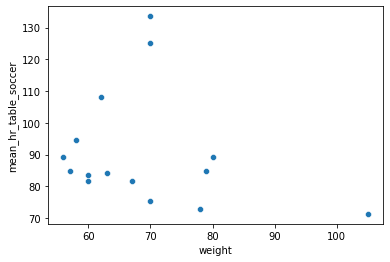

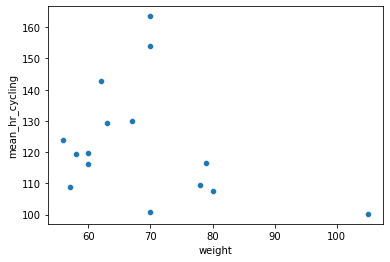

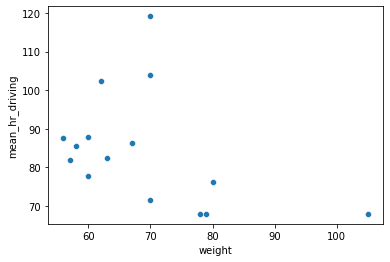

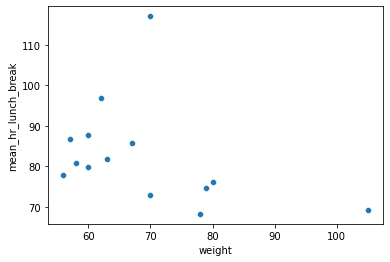

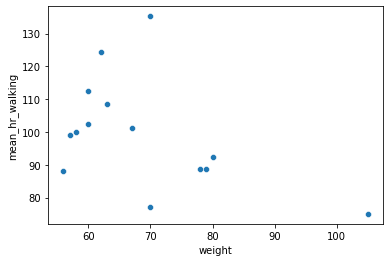

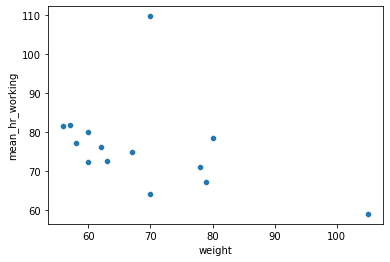

In [50]:
for _, activity in ACTIVITY_DICT.items():
    sns.scatterplot(x="weight",y="mean_hr_{}".format(activity),data=df)
    plt.show()

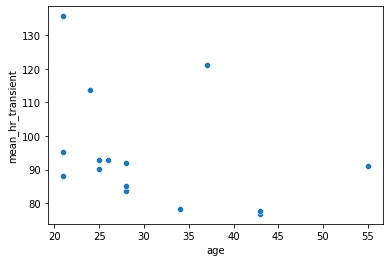

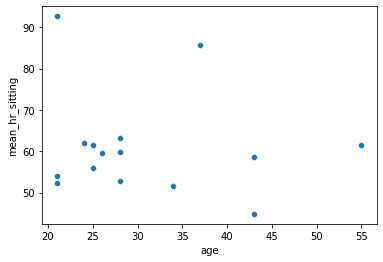

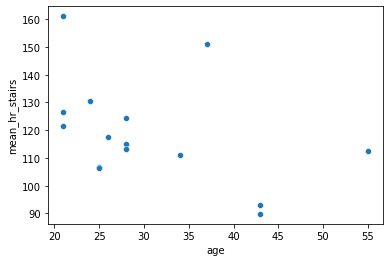

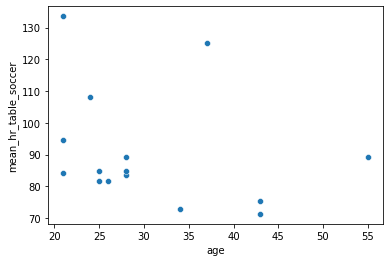

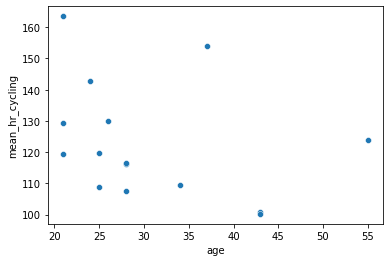

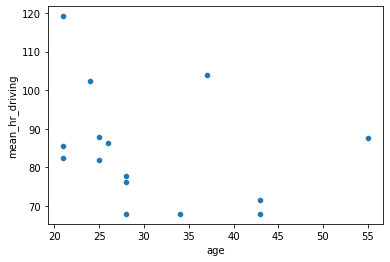

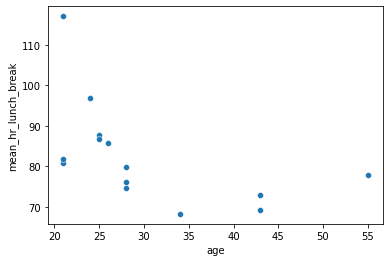

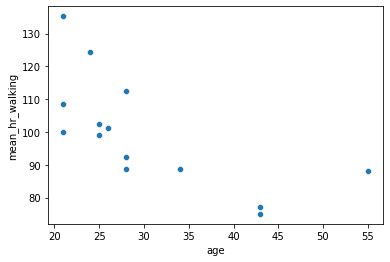

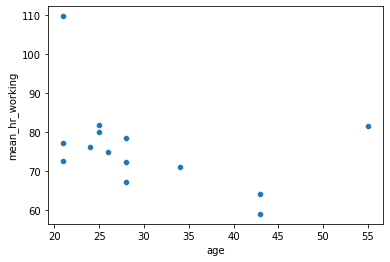

In [51]:
for _, activity in ACTIVITY_DICT.items():
    sns.scatterplot(x="age",y="mean_hr_{}".format(activity),data=df)
    plt.show()